In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from scipy.stats import bernoulli
import scipy
from collections import deque
from sympy import Symbol, solve

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [4]:
A = [3.1 , 1.9 , 2.4 , 2.8 , 2.9 , 3.0 , 2.8 , 2.3, 2.2 , 2.6]

print(f'평균 : {np.mean(A)}')

print(f'표본분산 : {np.var(A ,ddof=1)}')


print(f'표본표준편차 : {np.std(A ,ddof=1)}')

평균 : 2.6
표본분산 : 0.1511111111111111
표본표준편차 : 0.38873012632302


[2.262]
[-2.262]


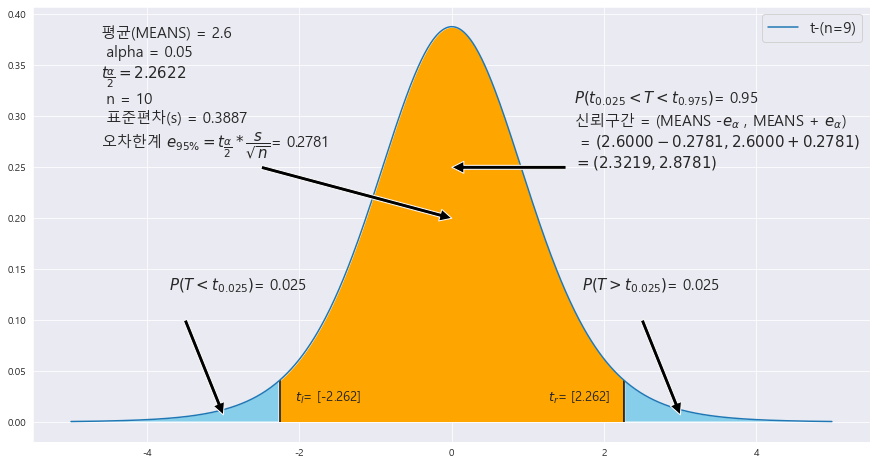

In [63]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))




A = [3.1 , 1.9 , 2.4 , 2.8 , 2.9 , 3.0 , 2.8 , 2.3, 2.2 , 2.6]

MEANS = round(np.mean(A),4)
STDS = round(np.std(A , ddof=1) ,4)




n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .27, f'평균(MEANS) = {MEANS}\n alpha = {round(1-area,4)}\n' + r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r +f'\n n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')

plt.annotate('' , xy=(3.0, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-3.0, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.text(1.71 , .13, r'$P(T>t_{%.3f})$' % trust + f'= {round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$P(T<t_{%.3f})$' % trust + f'= {round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)





b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.12]
[-2.12]


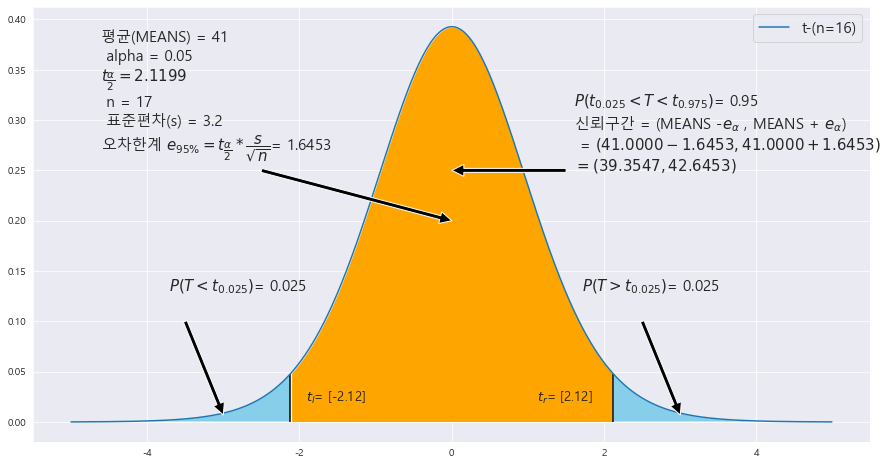

In [64]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))






MEANS = 41
STDS = 3.2




n = 17 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=t_l) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .27, f'평균(MEANS) = {MEANS}\n alpha = {round(1-area,4)}\n' + r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r +f'\n n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')

plt.annotate('' , xy=(3.0, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-3.0, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))

ax.text(1.71 , .13, r'$P(T>t_{%.3f})$' % trust + f'= {round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$P(T<t_{%.3f})$' % trust + f'= {round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)





b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.11]
[-2.11]
-2.2922


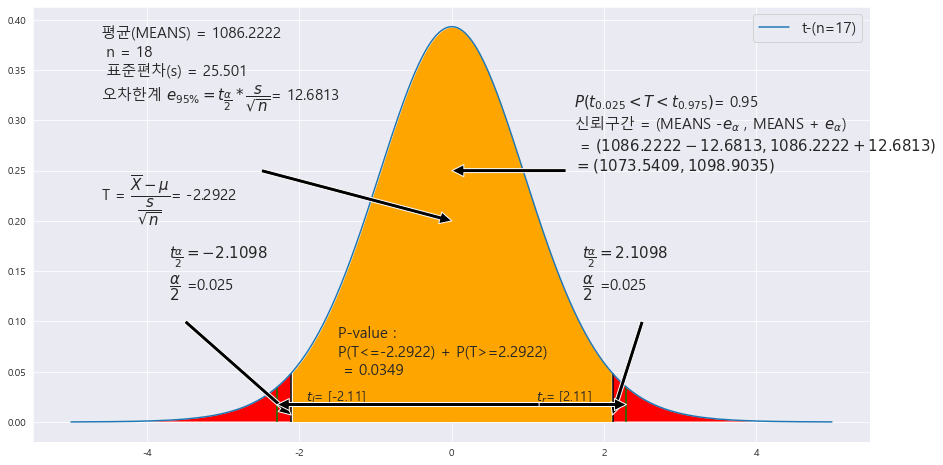

In [98]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))



A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
A = list(map(int, A.split(' ')))


MEANS = round(np.mean(A),4)
STDS = round(np.std(A , ddof =1 ) , 4)
MO_MEAN = 1100



n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{95\% } = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$'+f'= {E}',fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [72]:
round(-(MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

2.2922

[2.015]
[-2.015]
1.9861


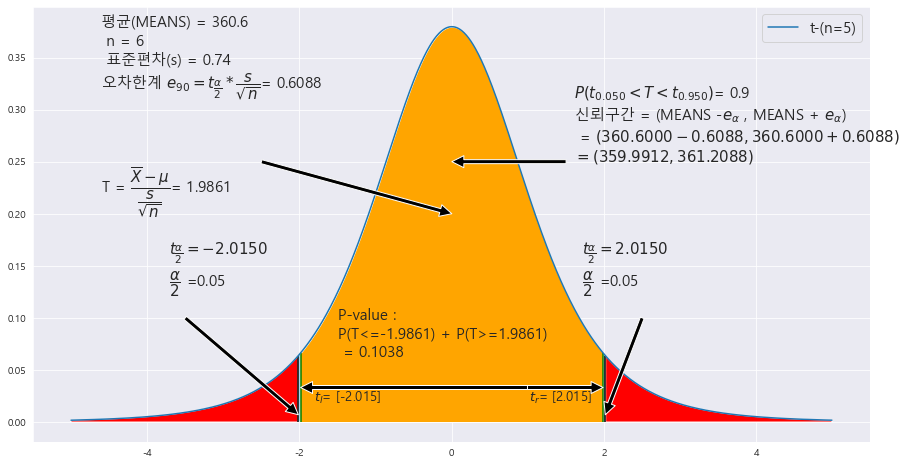

In [113]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 360.6
STDS = 0.74
MO_MEAN = 360



n = 6 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 90 #신뢰도
trust = round( (1- trust/100)/2 , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4)



# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<t_r) & (X>t_l) , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r) - scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{\dfrac{\alpha}{2}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust*2)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T<t_{%.3f})$' % (trust , 1-trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_l + '\n' +r'$\dfrac{\alpha}{2}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) + 1 - (scipy.stats.t(dof_2).cdf(t_1))),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_1) | (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) | (X<=-t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5 , annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) + P(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.262]
[-2.262]
-2.5097


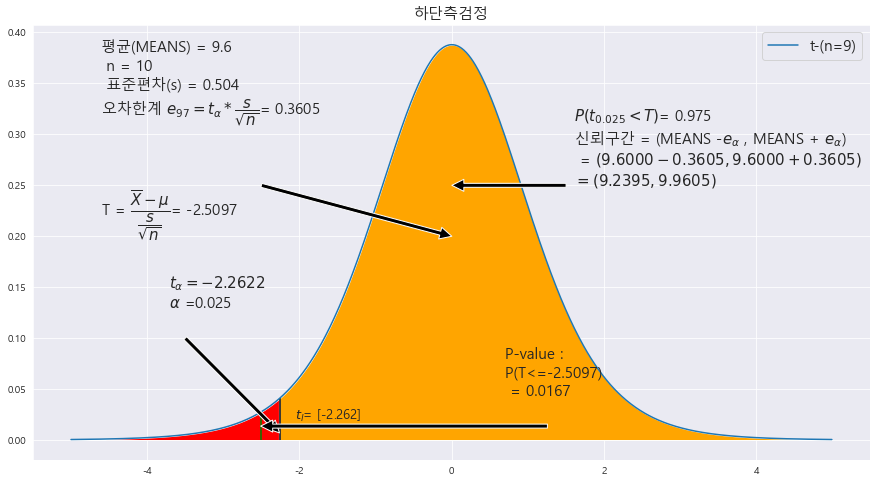

In [126]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 9.6
STDS = 0.504
MO_MEAN = 10



n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 97.5 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.015]
[-2.015]
-2.0282


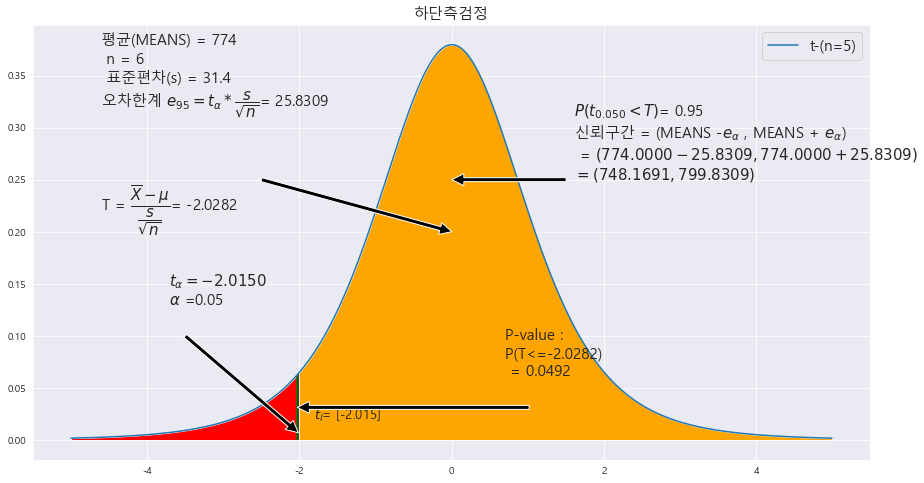

In [127]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 774
STDS = 31.4
MO_MEAN = 800



n = 6 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[14.8, 9.5, 11.2, 9.8, 10.2, 9.4]
[2.015]
[-2.015]
2.1627


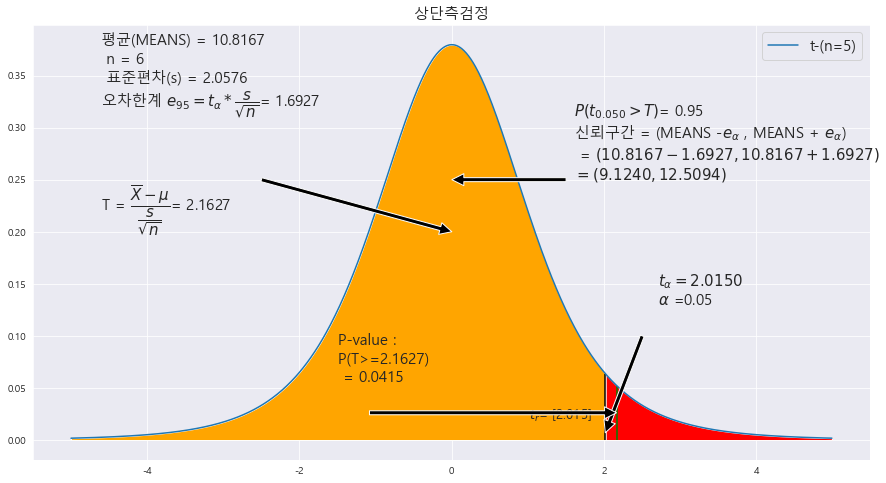

In [136]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
A = "14.8 9.5 11.2 9.8 10.2 9.4"
A = list(map(float, A.split(' ')))
print(A)

MEANS = round(np.mean(A) , 4)
STDS = round(np.std(A , ddof =1 ) ,4)
MO_MEAN = 9



n = len(A) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.833]
[-1.833]
1.807


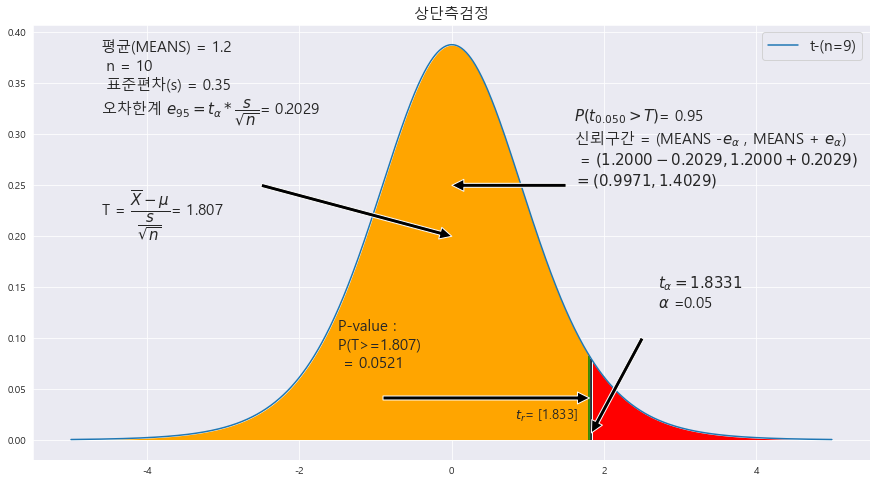

In [137]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "14.8 9.5 11.2 9.8 10.2 9.4"
# A = list(map(float, A.split(' ')))
# print(A)

MEANS = 1.2
STDS = 0.35
MO_MEAN = 1



n = 10 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[2.567]
[-2.567]
-2.5456


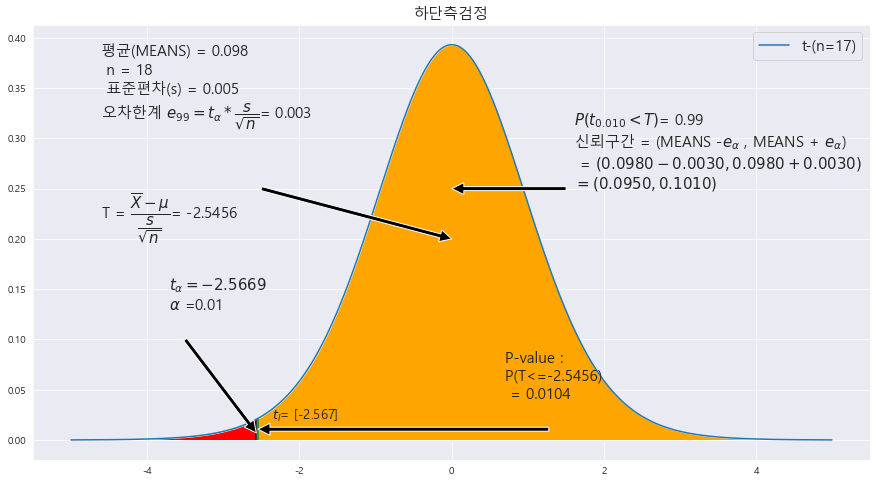

In [138]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "1073 1067 1103 1122 1057 1096 1057 1053 1089 1102 1100 1091 1053 1138 1063 1120 1077 1091"
# A = list(map(int, A.split(' ')))


MEANS = 0.098
STDS = 0.005
MO_MEAN = 0.101



n = 18 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 99 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('하단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=-t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(1- scipy.stats.t(dof_2).cdf(t_l)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}<T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_l ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_l) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_l, .007), xytext=(-3.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(-3.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_l + '\n' +r'${\alpha}$ =' +f'{round(float(scipy.stats.t(dof_2).cdf(t_l)),3)}',fontsize=15)

# ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(float(scipy.stats.t(dof_2).cdf(-t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X<=-t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_l) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

# ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
# plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(0.7, annotate_len+0.03 , f'P-value : \nP(T<={-t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

[1.711]
[-1.711]
0.75


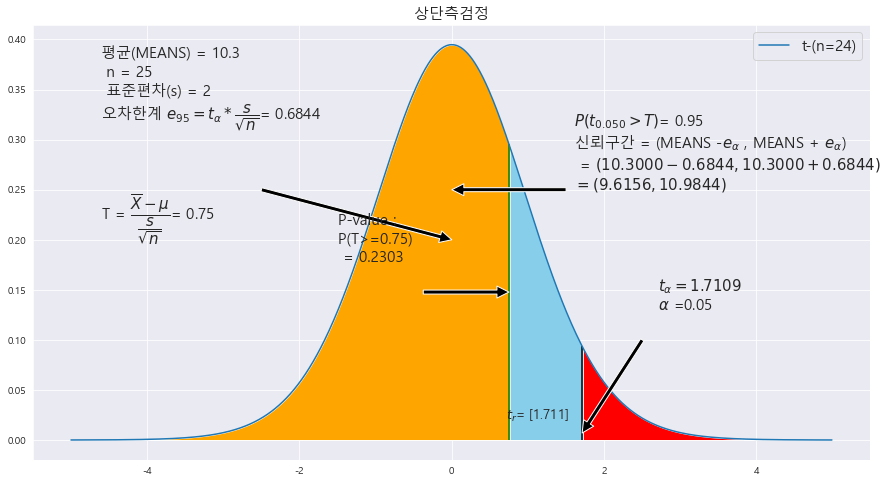

In [139]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "14.8 9.5 11.2 9.8 10.2 9.4"
# A = list(map(float, A.split(' ')))
# print(A)

MEANS = 10.3
STDS = 2
MO_MEAN = 10



n = 25 #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)

In [140]:
A = pd.DataFrame({'골퍼' : [1 , 2, 3, 4, 5, 6] , '구형 골프채' : [95 , 102 , 83 , 92 ,85 , 96] , '신형 골프채' : [92 , 96 , 83 , 88 , 84 , 91]}).T
A.loc['타수 차이 d_i'] = A.iloc[1 , :] - A.iloc[2 , :]
A

,0,1,2,3,4,5
골퍼,1,2,3,4,5,6
구형 골프채,95,102,83,92,85,96
신형 골프채,92,96,83,88,84,91
타수 차이 d_i,3,6,0,4,1,5


[2.015]
[-2.015]
3.3483


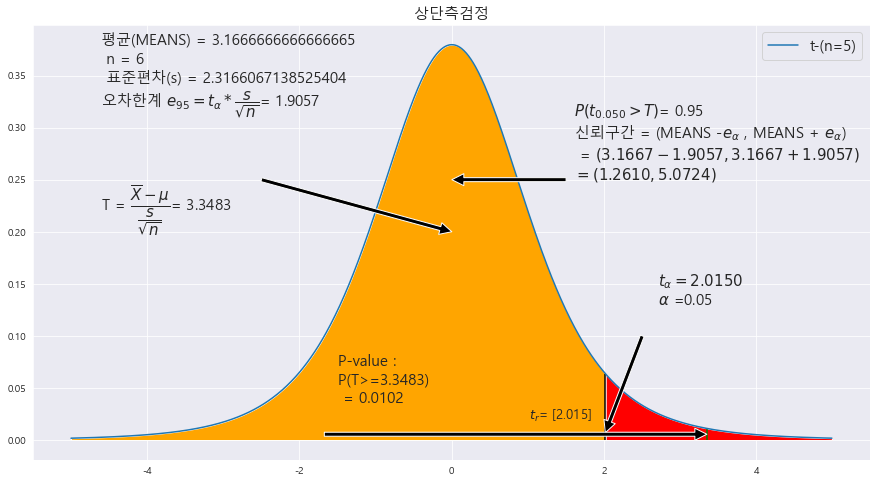

In [141]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "14.8 9.5 11.2 9.8 10.2 9.4"
# A = list(map(float, A.split(' ')))
# print(A)


MEANS = np.mean(A.iloc[-1 , :])
STDS = np.std(A.iloc[-1 , :] , ddof= 1)
MO_MEAN = 0



n = len(A.iloc[-1 , :]) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 95 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (MEANS -$e_{\alpha}$ , MEANS + $e_{\alpha}$)' +f'\n' + r' = $({%.4f} - {%.4f} , {%.4f} + {%.4f})$' % (MEANS, E , MEANS , E)  +f'\n' +r'$ = ({%.4f} , {%.4f})$' % (MEANS-E , MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)




In [142]:
A = pd.DataFrame({'감기환자' : [1 , 2, 3, 4, 5, 6,7,8] , 'A의 회복 기간' : [6 ,4,3,5,5,7,6,4] , 'B의 회복기간' : [4,3,4,3,4,6,3,3]}).T
A.loc['A의 회복기간 - B의 회복기간'] = A.iloc[1 , :] - A.iloc[2 , :]
A

,0,1,2,3,4,5,6,7
감기환자,1,2,3,4,5,6,7,8
A의 회복 기간,6,4,3,5,5,7,6,4
B의 회복기간,4,3,4,3,4,6,3,3
A의 회복기간 - B의 회복기간,2,1,-1,2,1,1,3,1


[1.415]
[-1.415]
3.0349


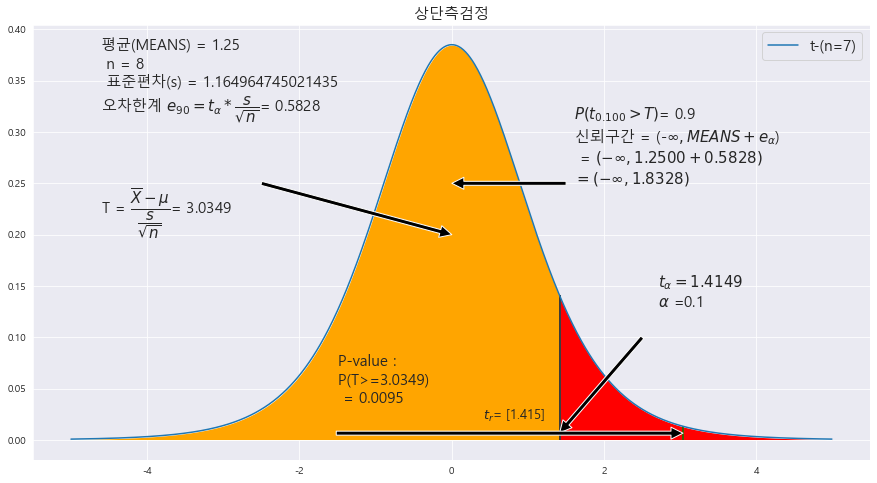

In [148]:
X = np.arange(-5,5 , .01)

fig = plt.figure(figsize=(15,8))


#
# A = "14.8 9.5 11.2 9.8 10.2 9.4"
# A = list(map(float, A.split(' ')))
# print(A)


MEANS = np.mean(A.iloc[-1 , :])
STDS = np.std(A.iloc[-1 , :] , ddof= 1)
MO_MEAN = 0



n = len(A.iloc[-1 , :]) #표본개수
dof_2 = [n-1] #자유도c

ax = sns.lineplot(x = X , y=scipy.stats.t(dof_2).pdf(X) )
trust = 90 #신뢰도
trust = round( (1- trust/100) , 4)
t_r =  scipy.stats.t(dof_2).ppf(1- trust)
print(t_r)
t_l = scipy.stats.t(dof_2).ppf(trust)
print(t_l)

E = round(float(t_r * STDS / math.sqrt(n)),4) #오차한계


ax.set_title('상단측검정' , fontsize = 15)
# =========================================================

ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X<=t_r)  , facecolor = 'orange') # x값 , y값 , 0 , X조건 인곳 , 색깔
area = round(float(scipy.stats.t(dof_2).cdf(t_r)),4)


plt.annotate('' , xy=(0, .2), xytext=(-2.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(-4.6 , .32, f'평균(MEANS) = {MEANS}\n'  +f' n = {n} \n 표준편차(s) = {STDS}\n' +r'오차한계 $e_{%d} = t_{{\alpha}}*\dfrac{s}{\sqrt{n}}$' % ((1-  trust)*100 ) +f'= {E}' ,fontsize=15)

plt.annotate('' , xy=(0, .25), xytext=(1.5 , .25)  , arrowprops = dict(facecolor = 'black'))
ax.text(1.6 , .25, r'$P(t_{%.3f}>T)$' % (trust) + f'= {area}\n' + r'신뢰구간 = (-$\infty , MEANS + e_{\alpha}$)' +f'\n' + r' = $(-\infty , {%.4f} + {%.4f})$' % (MEANS, E)   +f'\n' +r'$ = (-\infty , {%.4f})$' % (MEANS+E)  ,fontsize=15)

# ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')
ax.vlines(x = t_r ,ymin=0 , ymax= scipy.stats.t(dof_2).pdf(t_r) , colors = 'black')




# plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
plt.annotate('' , xy=(t_r, .007), xytext=(2.5 , .1)  , arrowprops = dict(facecolor = 'black'))
# ax.text(1.71 , .13, r'$t_{\dfrac{\alpha}{2}} = {%.4f}$' % t_r + '\n' +r'$\dfrac{\alpha}{2}$ =' + f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)
ax.text(2.71 , .13, r'$t_{{\alpha}} = {%.4f}$' % t_r + '\n' +r'${\alpha}$ =' +f'{round(float(1- scipy.stats.t(dof_2).cdf(t_r)),3)}',fontsize=15)

ax.text(t_r - 1 , 0.02 , r'$t_r$' + f'= {t_r}'  , fontsize = 13)
# ax.text(t_l + .2 , 0.02 , r'$t_l$' + f'= {t_l}'  , fontsize = 13)




#==================================== 가설 검정 ==========================================



t_1 = round((MEANS - MO_MEAN)/ (STDS / math.sqrt(n)),4)

print(t_1)
t_1 = abs(t_1)
area = round(1- float(scipy.stats.t(dof_2).cdf(t_1) ),4)
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where =  (X>=t_1) , facecolor = 'skyblue') # x값 , y값 , 0 , X조건 인곳 , 색깔
ax.fill_between(X, scipy.stats.t(dof_2).pdf(X) , 0 , where = (X>=t_r) , facecolor = 'red') # x값 , y값 , 0 , X조건 인곳 , 색깔

ax.vlines(x= t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))
# ax.vlines(x= -t_1, ymin= 0 , ymax= stats.t(dof_2).pdf(-t_1) , color = 'green' , linestyle ='solid' , label ='{}'.format(2))

annotate_len = stats.t(dof_2).pdf(t_1) /2
plt.annotate('' , xy=(t_1, annotate_len), xytext=(-t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
# plt.annotate('' , xy=(-t_1, annotate_len), xytext=(t_1/2 , annotate_len)  , arrowprops = dict(facecolor = 'black'))
ax.text(-1.5, annotate_len+0.03 , f'P-value : \nP(T>={t_1}) \n = {area}',fontsize=15)

mo = '모평균'

ax.text(-4.6 , .22, r'T = $\dfrac{\overline{X} - {\mu}}{\dfrac{s}{\sqrt{n}}}$' + f'= { round((MEANS - MO_MEAN)/(STDS / math.sqrt(n)),4) }' ,fontsize=15)






b = ['t-(n={})'.format(i) for i in dof_2]
plt.legend(b , fontsize = 15)


